In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


# Histogram using Matplotlib

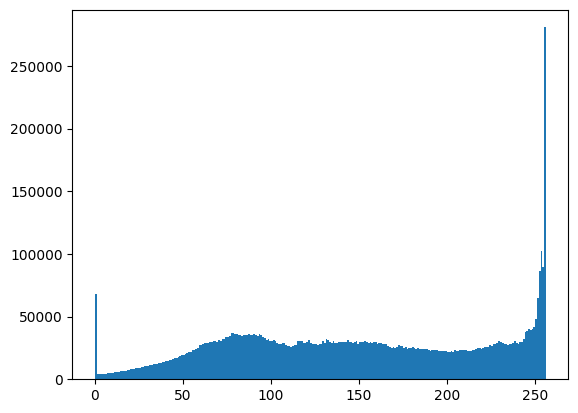

In [12]:
img = cv2.imread('saved/home.jpg')

cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.hist(img.ravel(),256,[0,256])
plt.show()

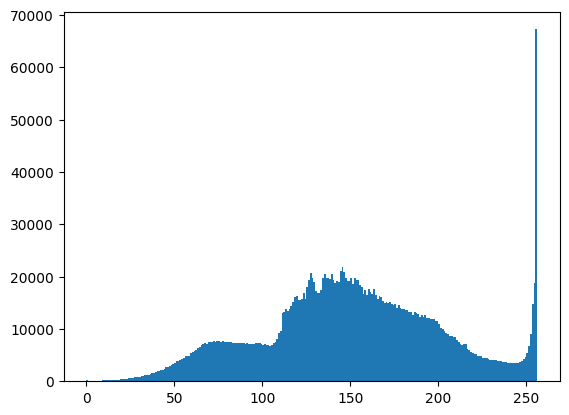

In [13]:
img = cv2.imread('saved/home.jpg', 0)

cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.hist(img.ravel(),256,[0,256])
plt.show()

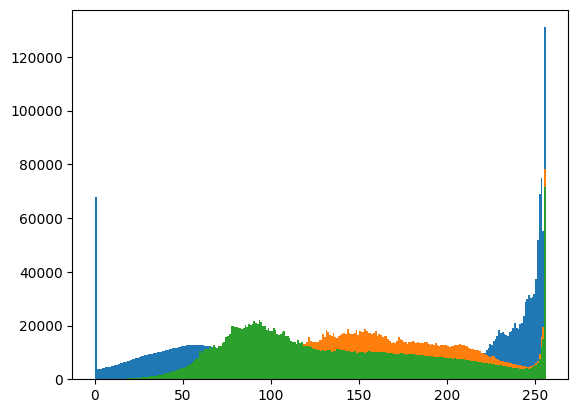

In [14]:
img = cv2.imread('saved/home.jpg')

b,g,r = cv2.split(img)

plt.hist(b.ravel(),256,[0,256])
plt.hist(g.ravel(),256,[0,256])
plt.hist(r.ravel(),256,[0,256])
plt.show()

# Histogram using CV

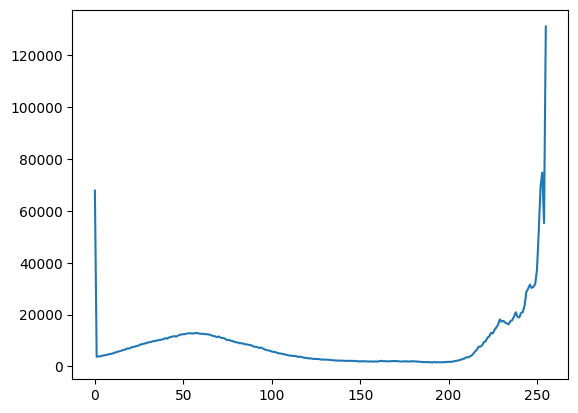

In [15]:
img = cv2.imread('saved/home.jpg')

hist = cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist)
plt.show()


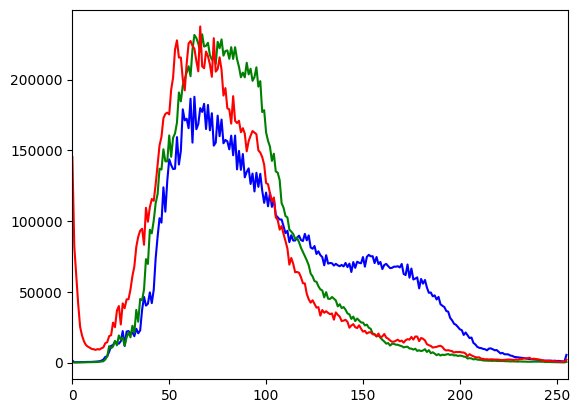

In [16]:
img = cv2.imread('saved/virat1.jpg',1)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## Histogram Equalization - used for contrast enhancement eg. in medical and satelite images

### 1] AHE - Adaptive Histogram Equalization [ Image is divided into small tiles.]

#### Problem - The noise in relatively homogenous regions of the image is overamplified by AHE.

<br><br><br>
<h3 style=' text-align: center;'>Approach 1</h3>
<br><br><br>

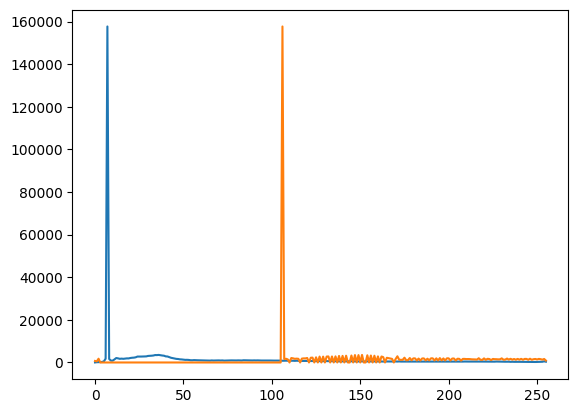

In [7]:
img = cv2.imread('saved/earth.jpg')

gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
disp = gray_img.copy()

hist1 = cv2.calcHist([gray_img],[0],None,[256],[0,256])
# plt.plot(hist,'b')

equalize_hist = cv2.equalizeHist(gray_img)
hist2 = cv2.calcHist([equalize_hist],[0],None,[256],[0,256])

res = np.hstack((hist1,hist2))
plt.plot(res)
plt.show()



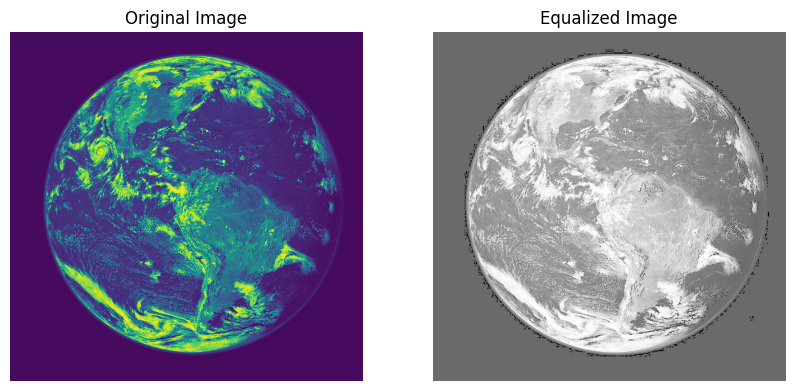

In [8]:
equalize_hist = cv2.cvtColor(equalize_hist,cv2.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(disp)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(equalize_hist)
ax[1].axis('off')
ax[1].set_title('Equalized Image')

plt.show()

<br><br><br><h3 style=' text-align: center;'>Approach 2</h3><br><br><br>

Text(0.5, 1.0, 'Enhanced')

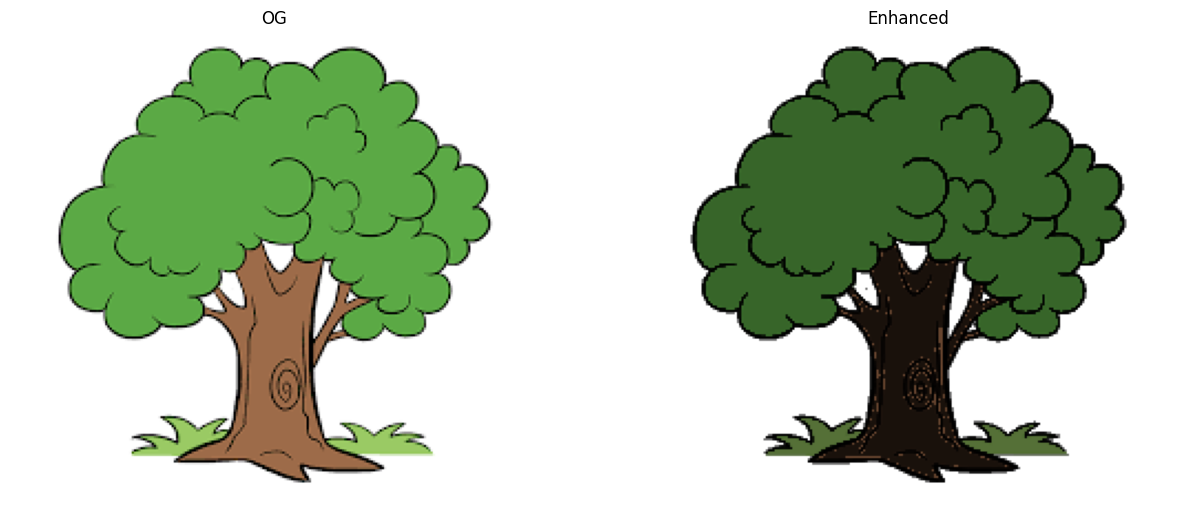

In [9]:
img = cv2.imread('saved/tree.jpg')
b,g,r = cv2.split(img)

img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv)

v = cv2.equalizeHist(v)

merged_hsv = cv2.merge((h,s,v))
enh_img = cv2.cvtColor(merged_hsv,cv2.COLOR_HSV2BGR)

cv2.imshow('ORIGINAL',img)
cv2.imshow('New',enh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

fig,ax = plt.subplots(1,2,figsize=(15,15))

ax[0].imshow(img[:,:,::-1])
ax[0].axis('off')
ax[0].set_title('OG')

ax[1].imshow(enh_img[:,:,::-1])
ax[1].axis('off')
ax[1].set_title('Enhanced')

## CLAHE - Contrast Limited AHE
### It solves the problem of impurity maximisation by clipping the extra values

Text(0.5, 1.0, 'CLAHE')

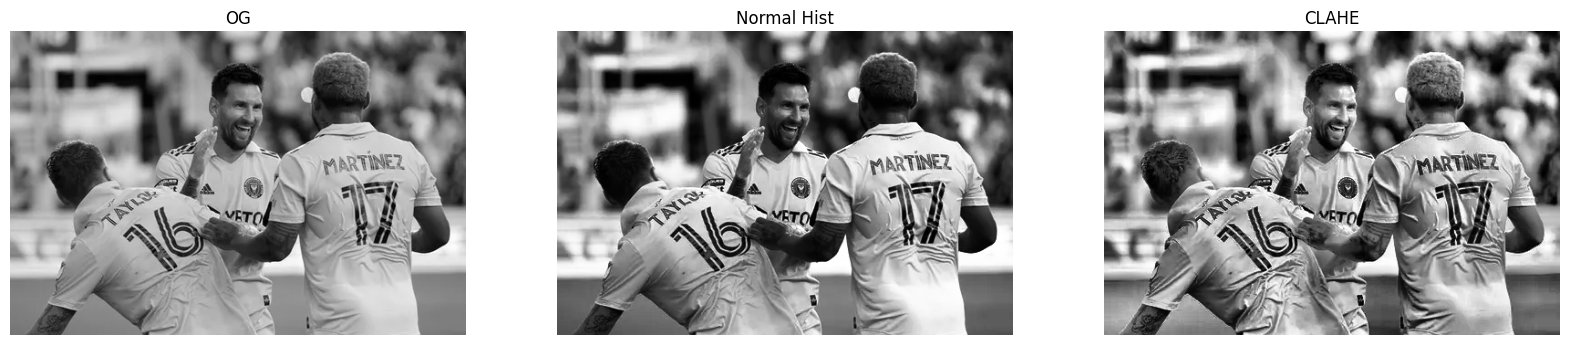

In [10]:
img = cv2.imread('saved/messi.jpg')

gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# clipLimit = > Threshold for contrast limiting

clahe = cv2.createCLAHE(clipLimit=5)

clahe_img = clahe.apply(gray_img)

# clahe_img = cv2.cvtColor(clahe_img,cv2.COLOR_GRAY2BGR)

normal_hist = cv2.equalizeHist(gray_img)


gray_img = cv2.cvtColor(gray_img,cv2.COLOR_GRAY2RGB)
normal_hist = cv2.cvtColor(normal_hist,cv2.COLOR_GRAY2RGB)
clahe_img = cv2.cvtColor(clahe_img,cv2.COLOR_GRAY2RGB)



cv2.imshow('ORIGINAL',gray_img)
cv2.imshow('CLAHE',clahe_img)
cv2.imshow('NH',normal_hist)
cv2.waitKey(0)
cv2.destroyAllWindows()

fig,ax = plt.subplots(1,3,figsize=(20,20))


ax[0].imshow(gray_img)
ax[0].axis('off')
ax[0].set_title('OG')

ax[1].imshow(normal_hist)
ax[1].axis('off')
ax[1].set_title('Normal Hist')

ax[2].imshow(clahe_img)
ax[2].axis('off')
ax[2].set_title('CLAHE')

<h3>
    <p>OG : Original Image</p>
    <p>Normal Hist : AHE Image, but it has problem where a a region with homogenous color is over amplified </p>
    <p>CLAHE : It gives more better image then AHE</p>
</h3>